# MultiEval Example

This notebook demonstrates a basic parameter sweep with LensKits `MultiEval` class.

## Setup

We first need to import our libraries.

In [1]:
import sys
sys.path.insert(0,'C:\\Users\\Jacob\\Documents\\GitHub\\lenskit_confidence')

In [2]:
from lenskit.batch import MultiEval
from lenskit.crossfold import partition_users, SampleN
from lenskit.algorithms import basic, als, item_knn, user_knn
from lenskit.datasets import MovieLens
from lenskit import topn, util #, metrics
from lenskit.metrics import predict
import pandas as pd
import matplotlib.pyplot as plt

Progress bars are useful:

In [3]:
from tqdm.notebook import tqdm_notebook as tqdm
tqdm.pandas()

C:\Users\Jacob\anaconda3\lib\site-packages\tqdm\std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


It takes a little while to run things, and can get kinda quiet in here. Let's set up logging so we can see the logging output in the notebook's message stream:

In [4]:
util.log_to_notebook()

[   INFO] lenskit.util.log notebook logging configured


Then set up the data access.

In [41]:
mlsmall = MovieLens('../data/ml-latest-small')
#mlsmall = MovieLens('../data/ml-1m')
#mlsmall = MovieLens('../data/ml-10m')
#mlsmall = MovieLens('../data/ml-20m')


## Experiment

We're going to run our evaluation and store its output in the `my-eval` directory, generating 20-item recommendation lists::

In [42]:
eval = MultiEval('my-eval', recommend = 25)

We're going to use a 5-fold cross-validation setup.  We save the data into a list in memory so we have access to the test data later.  In a larger experiment, you might write the partitions to disk and pass the file names to `add_datasets`.

In [43]:
pairs = list(partition_users(mlsmall.ratings, 5, SampleN(5)))
#pairs = (partition_users(mlsmall.ratings, 5, SampleN(5)))
pairs

[   INFO] lenskit.crossfold partitioning 100004 rows for 671 users into 5 partitions
[   INFO] lenskit.crossfold fold 0: selecting test ratings
[   INFO] lenskit.crossfold fold 0: partitioning training data
[   INFO] lenskit.crossfold fold 1: selecting test ratings
[   INFO] lenskit.crossfold fold 1: partitioning training data
[   INFO] lenskit.crossfold fold 2: selecting test ratings
[   INFO] lenskit.crossfold fold 2: partitioning training data
[   INFO] lenskit.crossfold fold 3: selecting test ratings
[   INFO] lenskit.crossfold fold 3: partitioning training data
[   INFO] lenskit.crossfold fold 4: selecting test ratings
[   INFO] lenskit.crossfold fold 4: partitioning training data


[TTPair(train=        user  item  rating   timestamp
 0          1    31     2.5  1260759144
 1          1  1029     3.0  1260759179
 2          1  1061     3.0  1260759182
 3          1  1129     2.0  1260759185
 4          1  1172     4.0  1260759205
 ...      ...   ...     ...         ...
 99999    671  6268     2.5  1065579370
 100000   671  6269     4.0  1065149201
 100001   671  6365     4.0  1070940363
 100002   671  6385     2.5  1070979663
 100003   671  6565     3.5  1074784724
 
 [99329 rows x 4 columns], test=       user   item  rating   timestamp
 626       8   1876     3.5  1154389528
 695       8  42007     2.0  1154473042
 682       8   7361     4.0  1154465367
 629       8   2100     3.0  1154389460
 631       8   2194     4.5  1154464735
 ...     ...    ...     ...         ...
 99905   671    608     4.0  1064890575
 99903   671    589     5.0  1064891610
 99929   671   1641     4.0  1063503954
 99963   671   3421     4.0  1063502737
 99935   671   2028     4.0  10648

In [44]:
eval.add_datasets(pairs, name = 'ML-Small')

In [45]:
eval.add_algorithms([item_knn.ItemItem(nnbrs = f) for f in [10, 25, 50, 100]], 
                    attrs = ['nnbrs'], name = 'ItemKNN')

In [ ]:
eval.add_algorithms([user_knn.UserUser(nnbrs = f) for f in [10, 25, 50, 100]], 
                    attrs = ['nnbrs'], name = 'UserKNN')

And add a popular baseline for comparison:

In [ ]:
eval.add_algorithms(basic.Popular(), name = 'Pop')

And finally, we will run the experiment!

In [46]:
eval.run(progress = tqdm)

[   INFO] lenskit.batch._multi starting run 1: ItemItem(nnbrs=10, msize=None) on ML-Small:1
[   INFO] lenskit.batch._multi adapting ItemItem(nnbrs=10, msize=None) into a recommender
[   INFO] lenskit.batch._multi training algorithm ItemItem(nnbrs=10, msize=None) on 99329 ratings
[   INFO] lenskit.algorithms.item_knn [ 28ms] made sparse matrix for 9054 items (99329 ratings from 671 users)
[   INFO] lenskit.algorithms.item_knn [ 55ms] computed means for 9054 items
[   INFO] lenskit.algorithms.item_knn [ 81ms] normalized rating matrix columns
[   INFO] lenskit.algorithms.item_knn [ 84ms] computing similarity matrix
[   INFO] lenskit.algorithms.item_knn [ 97ms] splitting 9054 items (94613 ratings) into 10 blocks
[   INFO] lenskit.algorithms.item_knn [2.40s] computed 8762916 similarities for 9054 items in 10 blocks
[   INFO] lenskit.algorithms.item_knn [2.51s] sorting similarity matrix with 8762916 entries
[   INFO] lenskit.algorithms.item_knn [2.99s] got neighborhoods for 5734 of 9054 item

[   INFO] lenskit.batch._multi adapting ItemItem(nnbrs=100, msize=None) into a recommender
[   INFO] lenskit.batch._multi training algorithm ItemItem(nnbrs=100, msize=None) on 99329 ratings
[   INFO] lenskit.algorithms.item_knn [ 23ms] made sparse matrix for 9054 items (99329 ratings from 671 users)
[   INFO] lenskit.algorithms.item_knn [ 43ms] computed means for 9054 items
[   INFO] lenskit.algorithms.item_knn [ 67ms] normalized rating matrix columns
[   INFO] lenskit.algorithms.item_knn [ 73ms] computing similarity matrix
[   INFO] lenskit.algorithms.item_knn [ 87ms] splitting 9054 items (94613 ratings) into 10 blocks
[   INFO] lenskit.algorithms.item_knn [2.41s] computed 8762916 similarities for 9054 items in 10 blocks
[   INFO] lenskit.algorithms.item_knn [2.52s] sorting similarity matrix with 8762916 entries
[   INFO] lenskit.algorithms.item_knn [2.97s] got neighborhoods for 5734 of 9054 items
[   INFO] lenskit.algorithms.item_knn [2.97s] computed 8762916 neighbor pairs
[   INFO] 

[   INFO] lenskit.batch._multi training algorithm ItemItem(nnbrs=50, msize=None) on 99334 ratings
[   INFO] lenskit.algorithms.item_knn [ 20ms] made sparse matrix for 9055 items (99334 ratings from 671 users)
[   INFO] lenskit.algorithms.item_knn [ 36ms] computed means for 9055 items
[   INFO] lenskit.algorithms.item_knn [ 49ms] normalized rating matrix columns
[   INFO] lenskit.algorithms.item_knn [ 51ms] computing similarity matrix
[   INFO] lenskit.algorithms.item_knn [ 63ms] splitting 9055 items (94724 ratings) into 10 blocks
[   INFO] lenskit.algorithms.item_knn [2.28s] computed 8758604 similarities for 9055 items in 10 blocks
[   INFO] lenskit.algorithms.item_knn [2.39s] sorting similarity matrix with 8758604 entries
[   INFO] lenskit.algorithms.item_knn [2.87s] got neighborhoods for 5732 of 9055 items
[   INFO] lenskit.algorithms.item_knn [2.87s] computed 8758604 neighbor pairs
[   INFO] lenskit.algorithms.item_knn [3.53s] transposed matrix for optimization
[   INFO] lenskit.alg

[   INFO] lenskit.algorithms.item_knn [ 43ms] made sparse matrix for 9060 items (99334 ratings from 671 users)
[   INFO] lenskit.algorithms.item_knn [ 64ms] computed means for 9060 items
[   INFO] lenskit.algorithms.item_knn [ 79ms] normalized rating matrix columns
[   INFO] lenskit.algorithms.item_knn [ 84ms] computing similarity matrix
[   INFO] lenskit.algorithms.item_knn [ 97ms] splitting 9060 items (94749 ratings) into 10 blocks
[   INFO] lenskit.algorithms.item_knn [4.76s] computed 8771734 similarities for 9060 items in 10 blocks
[   INFO] lenskit.algorithms.item_knn [4.89s] sorting similarity matrix with 8771734 entries
[   INFO] lenskit.algorithms.item_knn [5.45s] got neighborhoods for 5732 of 9060 items
[   INFO] lenskit.algorithms.item_knn [5.45s] computed 8771734 neighbor pairs
[   INFO] lenskit.algorithms.item_knn [6.49s] transposed matrix for optimization
[   INFO] lenskit.algorithms.basic trained unrated candidate selector for 99334 ratings
[   INFO] lenskit.batch._multi 

[   INFO] lenskit.algorithms.item_knn [ 25ms] made sparse matrix for 9051 items (99334 ratings from 671 users)
[   INFO] lenskit.algorithms.item_knn [ 44ms] computed means for 9051 items
[   INFO] lenskit.algorithms.item_knn [ 59ms] normalized rating matrix columns
[   INFO] lenskit.algorithms.item_knn [ 63ms] computing similarity matrix
[   INFO] lenskit.algorithms.item_knn [ 86ms] splitting 9051 items (94656 ratings) into 10 blocks
[   INFO] lenskit.algorithms.item_knn [2.82s] computed 8755386 similarities for 9051 items in 10 blocks
[   INFO] lenskit.algorithms.item_knn [2.92s] sorting similarity matrix with 8755386 entries
[   INFO] lenskit.algorithms.item_knn [3.37s] got neighborhoods for 5730 of 9051 items
[   INFO] lenskit.algorithms.item_knn [3.37s] computed 8755386 neighbor pairs
[   INFO] lenskit.algorithms.item_knn [4.02s] transposed matrix for optimization
[   INFO] lenskit.algorithms.basic trained unrated candidate selector for 99334 ratings
[   INFO] lenskit.batch._multi 

[   INFO] lenskit.algorithms.item_knn [ 35ms] computed means for 9051 items
[   INFO] lenskit.algorithms.item_knn [ 45ms] normalized rating matrix columns
[   INFO] lenskit.algorithms.item_knn [ 47ms] computing similarity matrix
[   INFO] lenskit.algorithms.item_knn [ 59ms] splitting 9051 items (94656 ratings) into 10 blocks
[   INFO] lenskit.algorithms.item_knn [2.25s] computed 8755386 similarities for 9051 items in 10 blocks
[   INFO] lenskit.algorithms.item_knn [2.39s] sorting similarity matrix with 8755386 entries
[   INFO] lenskit.algorithms.item_knn [2.86s] got neighborhoods for 5730 of 9051 items
[   INFO] lenskit.algorithms.item_knn [2.86s] computed 8755386 neighbor pairs
[   INFO] lenskit.algorithms.item_knn [3.67s] transposed matrix for optimization
[   INFO] lenskit.algorithms.basic trained unrated candidate selector for 99334 ratings
[   INFO] lenskit.batch._multi trained algorithm ItemItem(nnbrs=100, msize=None) in 3.71s
[   INFO] lenskit.batch._multi generating 670 predic

[   INFO] lenskit.algorithms.item_knn [ 37ms] computed means for 9058 items
[   INFO] lenskit.algorithms.item_knn [ 47ms] normalized rating matrix columns
[   INFO] lenskit.algorithms.item_knn [ 50ms] computing similarity matrix
[   INFO] lenskit.algorithms.item_knn [ 61ms] splitting 9058 items (94705 ratings) into 10 blocks
[   INFO] lenskit.algorithms.item_knn [2.25s] computed 8759938 similarities for 9058 items in 10 blocks
[   INFO] lenskit.algorithms.item_knn [2.35s] sorting similarity matrix with 8759938 entries
[   INFO] lenskit.algorithms.item_knn [2.79s] got neighborhoods for 5730 of 9058 items
[   INFO] lenskit.algorithms.item_knn [2.79s] computed 8759938 neighbor pairs
[   INFO] lenskit.algorithms.item_knn [3.43s] transposed matrix for optimization
[   INFO] lenskit.algorithms.basic trained unrated candidate selector for 99334 ratings
[   INFO] lenskit.batch._multi trained algorithm ItemItem(nnbrs=50, msize=None) in 3.46s
[   INFO] lenskit.batch._multi generating 670 predict

## Analysis

Now that the experiment is run, we can read its outputs.

First the run metadata:

In [47]:
runs = pd.read_csv('my-eval/runs.csv')
runs.set_index('RunId', inplace = True)
runs.head()

,DataSet,Partition,AlgoClass,AlgoStr,name,nnbrs,TrainTime,PredTime,RecTime
RunId,,,,,,,,,
1,ML-Small,1,ItemItem,"ItemItem(nnbrs=10, msize=None)",ItemKNN,10,3.810842,13.273242,12.513408
2,ML-Small,1,ItemItem,"ItemItem(nnbrs=25, msize=None)",ItemKNN,25,3.745265,9.971539,11.327853
3,ML-Small,1,ItemItem,"ItemItem(nnbrs=50, msize=None)",ItemKNN,50,3.942969,9.301456,11.734629
4,ML-Small,1,ItemItem,"ItemItem(nnbrs=100, msize=None)",ItemKNN,100,3.622787,9.533616,15.313122
5,ML-Small,2,ItemItem,"ItemItem(nnbrs=10, msize=None)",ItemKNN,10,4.178027,11.649991,13.144398


This describes each run - a data set, partition, and algorithm combination.  To evaluate, we need to get the actual recommendations, and combine them with this:

In [48]:
recs = pd.read_parquet('my-eval/recommendations.parquet')
#del recs['RunId']
recs.head()

,item,score,user,rank,RunId
0,4338,5.153561,8,1,1
1,264,5.149229,8,2,1
2,32840,5.073723,8,3,1
3,40412,5.051454,8,4,1
4,53883,5.044566,8,5,1


We're going to compute per-(run,user) evaluations of the recommendations *before* combining with metadata. 

In order to evaluate the recommendation list, we need to build a combined set of truth data. Since this is a disjoint partition of users over a single data set, we can just concatenate the individual test frames:

In [49]:
truth = pd.concat((p.test for p in pairs), ignore_index = True)

#truth['score'] = truth['rating']
truth.head()

,user,item,rating,timestamp
0,8,1876,3.5,1154389528
1,8,42007,2.0,1154473042
2,8,7361,4.0,1154465367
3,8,2100,3.0,1154389460
4,8,2194,4.5,1154464735


Now we can set up an analysis and compute the results.

In [50]:
rla = topn.RecListAnalysis()
rla.add_metric(topn.ndcg) # precision, recall, recip_rank, dcg, ndcg
rla.add_metric(topn.precision)
#rla.add_metric(predict.rmse)
raw_ndcg = rla.compute(recs, truth)
raw_ndcg.head()

[   INFO] lenskit.topn analyzing 120700 recommendations (3355 truth rows)
[   INFO] lenskit.topn using rec key columns ['RunId', 'user']
[   INFO] lenskit.topn using truth key columns ['user']
[   INFO] lenskit.topn collecting truth data
[   INFO] lenskit.topn collecting metric results
[   INFO] lenskit.sharing.shm serialized <lenskit.topn._RLAJob object at 0x00000215024AC0A0> to 230514 pickle bytes with 2016 buffers of 3929500 bytes
[   INFO] lenskit.util.parallel setting up ProcessPoolExecutor w/ 2 workers
[   INFO] lenskit.topn measured 5364 lists in 14.79s


nrecs  ndcg  precision
RunId user                        
1     8      25.0   0.0        0.0
      9      25.0   0.0        0.0
      10     25.0   0.0        0.0
      15     25.0   0.0        0.0
      17     25.0   0.0        0.0

Next, we need to combine this with our run data, so that we know what algorithms and configurations we are evaluating:

In [51]:
### FOR NEIGHBORHOOD-BASED METHODS ONLY ###
ndcg = raw_ndcg.join(runs[['AlgoClass', 'nnbrs']], on = 'RunId')
ndcg.head()

nrecs  ndcg  precision AlgoClass  nnbrs
RunId user                                         
1     8      25.0   0.0        0.0  ItemItem   10.0
      9      25.0   0.0        0.0  ItemItem   10.0
      10     25.0   0.0        0.0  ItemItem   10.0
      15     25.0   0.0        0.0  ItemItem   10.0
      17     25.0   0.0        0.0  ItemItem   10.0

We can compute the overall average performance for each algorithm configuration - fillna makes the group-by happy with Popular's lack of a feature count:

In [52]:
### FOR NEIGHBORHOOD-BASED METHODS ONLY ###
ndcg.fillna(0).groupby(['AlgoClass', 'nnbrs'])['ndcg','precision'].mean()

<ipython-input-52-54bab6dbc4b0>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  ndcg.fillna(0).groupby(['AlgoClass', 'nnbrs'])['ndcg','precision'].mean()


ndcg  precision
AlgoClass nnbrs                     
0         0.0    0.010003   0.004030
ItemItem  10.0   0.000227   0.000119
          25.0   0.000148   0.000060
          50.0   0.000148   0.000060
          100.0  0.000148   0.000060

Now, we can plot this:

Text(0, 0.5, 'nDCG')

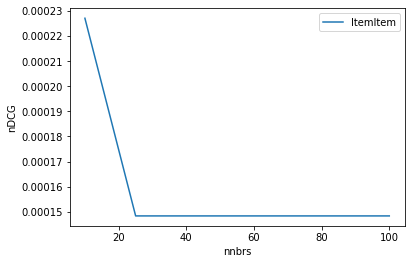

In [53]:
### FOR NEIGHBORHOOD-BASED METHODS ONLY ###
mf_scores = ndcg.groupby(['AlgoClass', 'nnbrs'])['ndcg'].mean().reset_index()
#pop_score = ndcg[ndcg['AlgoClass'] == 'Popular']['ndcg'].mean()
#plt.axhline(pop_score, color='grey', linestyle='--', label='Popular')
for algo, data in mf_scores.groupby('AlgoClass'):
    plt.plot(data['nnbrs'], data['ndcg'], label=algo)
plt.legend()
plt.xlabel('nnbrs')
plt.ylabel('nDCG')

Text(0, 0.5, 'Precision')

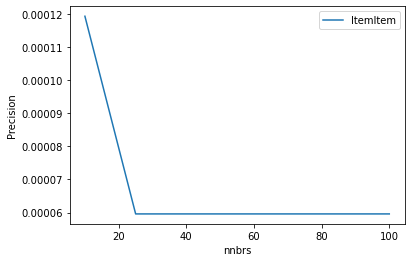

In [54]:
### FOR NEIGHBORHOOD-BASED METHODS ONLY ###
mf_scores = ndcg.groupby(['AlgoClass', 'nnbrs'])['precision'].mean().reset_index()
#pop_score = ndcg[ndcg['AlgoClass'] == 'Popular']['ndcg'].mean()
#plt.axhline(pop_score, color='grey', linestyle='--', label='Popular')
for algo, data in mf_scores.groupby('AlgoClass'):
    plt.plot(data['nnbrs'], data['precision'], label=algo)
plt.legend()
plt.xlabel('nnbrs')
plt.ylabel('Precision')